In [1]:
import pandas as pd
import os
 
# List of file paths
file_paths = [
    "dataset-of-60s.csv",
    "dataset-of-70s.csv",
    "dataset-of-80s.csv",
    "dataset-of-90s.csv",
    "dataset-of-00s.csv",
    "dataset-of-10s.csv"
]
 
# Load and merge datasets
dataframes = [pd.read_csv(file) for file in file_paths]
merged_df = pd.concat(dataframes, ignore_index=True)
 
# Remove duplicates
merged_df.drop_duplicates(inplace=True)
 
# Save cleaned dataset to a new CSV file
merged_df.to_csv("merged_cleaned_dataset.csv", index=False)
 
print("Merged and cleaned dataset saved as 'merged_cleaned_dataset.csv'")

Merged and cleaned dataset saved as 'merged_cleaned_dataset.csv'


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define file path
file_path = pd.read_csv("merged_cleaned_dataset.csv") 

In [3]:
# Dataset 
file_path.head()

track            artist  \
0  Jealous Kind Of Fella     Garland Green   
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403         0.490          0.000000    0.0779    0.845   
1     1       0.0337         0.018          0.107000    0.1760    0.797   
2     1       0.0380         0.846          0.000004    0.1190    0.908   
3     0       0.1040         0.706          0.024600    0.0610    0.967   
4     0       0.1240         0.857          0.000872    0.2130    0.906   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  185.655       173533               3    32.94975         9       1  
1  101.801       213613               4    48.82510        10       0  
2  115.940       223960               4    37.22663        12       0  
3  105.592       157907               4    24.75484         8       0  
4  114.617       245600               4    21.79874        14       0

In [4]:
# Basic information of the dataset
file_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40686 entries, 0 to 40685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             40686 non-null  object 
 1   artist            40686 non-null  object 
 2   uri               40686 non-null  object 
 3   danceability      40686 non-null  float64
 4   energy            40686 non-null  float64
 5   key               40686 non-null  int64  
 6   loudness          40686 non-null  float64
 7   mode              40686 non-null  int64  
 8   speechiness       40686 non-null  float64
 9   acousticness      40686 non-null  float64
 10  instrumentalness  40686 non-null  float64
 11  liveness          40686 non-null  float64
 12  valence           40686 non-null  float64
 13  tempo             40686 non-null  float64
 14  duration_ms       40686 non-null  int64  
 15  time_signature    40686 non-null  int64  
 16  chorus_hit        40686 non-null  float6

In [5]:
# Checking for missing values
file_path.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

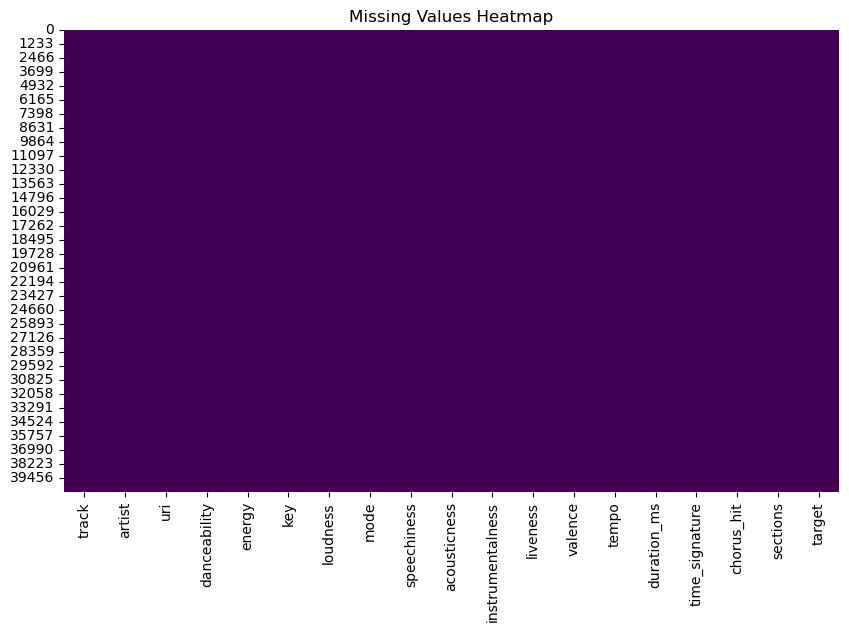

In [6]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(file_path.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

There is no missing values in dataset as seen from the graph above.

In [7]:
# Checking duplicate rows
duplicate_count = file_path.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 0


In [8]:
# Summary statistics
file_path.describe()

danceability        energy           key      loudness          mode  \
count  40686.000000  40686.000000  40686.000000  40686.000000  40686.000000   
mean       0.539050      0.578733      5.213489    -10.241982      0.692843   
std        0.177935      0.253034      3.533382      5.323189      0.461321   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
25%        0.419000      0.395000      2.000000    -12.842750      0.000000   
50%        0.551000      0.600000      5.000000     -9.279000      1.000000   
75%        0.669000      0.787000      8.000000     -6.387000      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  40686.000000  40686.000000      40686.000000  40686.000000   
mean       0.073034      0.365701          0.155767      0.201691   
std        0.086235      0.339518          0.304571      0.173146   
min        0.000000      0.000000          0.000000      0.013000   
25%        0.033700      0.039500          0.000000      0.094100   
50%        0.043500      0.261000          0.000125      0.132000   
75%        0.069900      0.679000          0.064275      0.261000   
max        0.960000      0.996000          1.000000      0.999000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  40686.000000  40686.000000  4.068600e+04    40686.000000  40686.000000   
mean       0.541789    119.320858  2.347383e+05        3.893133     40.131980   
std        0.267517     29.110536  1.194202e+05        0.424033     19.035917   
min        0.000000      0.000000  1.516800e+04        0.000000      0.000000   
25%        0.329000     97.343000  1.726400e+05        4.000000     27.611372   
50%        0.558000    117.528000  2.175730e+05        4.000000     35.856810   
75%        0.767000    136.506750  2.665698e+05        4.000000     47.659340   
max        0.996000    241.423000  4.170227e+06        5.000000    433.182000   

           sections        target  
count  40686.000000  40686.000000  
mean      10.470776      0.494839  
std        4.888917      0.499980  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%       10.000000      0.000000  
75%       12.000000      1.000000  
max      169.000000      1.000000

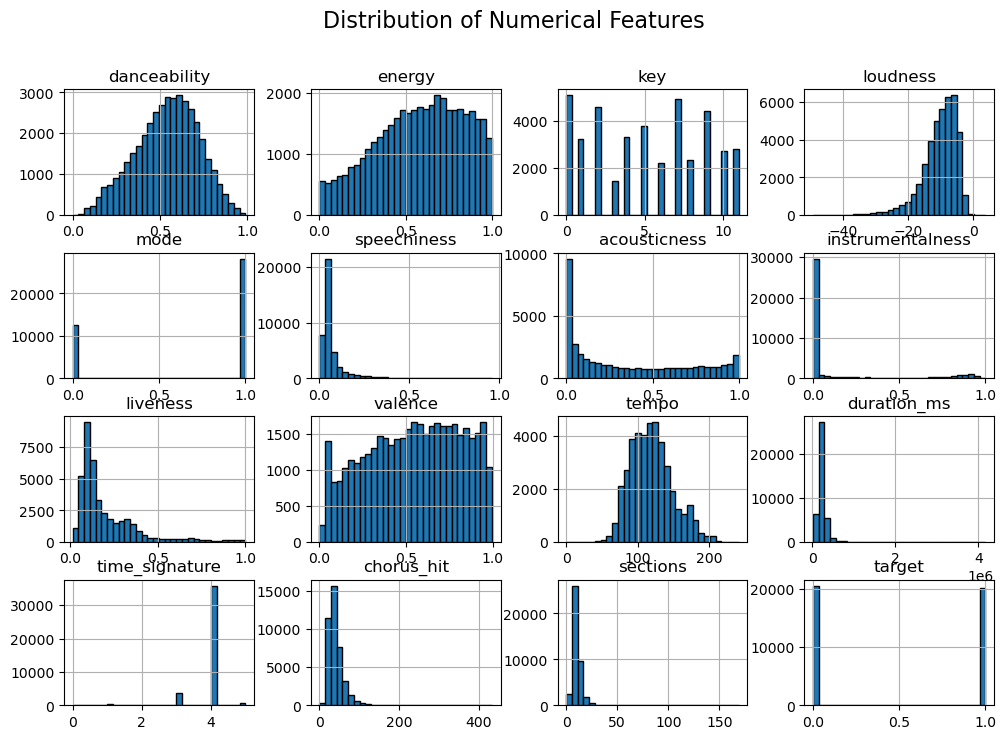

In [9]:
# Data distribution of numerical features
file_path.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

(a) The mean, median, and standard deviation

In [10]:
# Identify numeric and non-numeric columns
numeric_columns = file_path.select_dtypes(include=['number']).columns
non_numeric_columns = file_path.select_dtypes(exclude=['number']).columns

print("\nNumeric Columns:", list(numeric_columns))
print("Non-Numeric Columns:", list(non_numeric_columns))

# Compute mean, median, and standard deviation
stats_summary = file_path[numeric_columns].agg(['mean', 'median', 'std'])
print("\nStatistical Summary:\n")
stats_summary


Numeric Columns: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target']
Non-Numeric Columns: ['track', 'artist', 'uri']

Statistical Summary:



danceability    energy       key   loudness      mode  speechiness  \
mean        0.539050  0.578733  5.213489 -10.241982  0.692843     0.073034   
median      0.551000  0.600000  5.000000  -9.279000  1.000000     0.043500   
std         0.177935  0.253034  3.533382   5.323189  0.461321     0.086235   

        acousticness  instrumentalness  liveness   valence       tempo  \
mean        0.365701          0.155767  0.201691  0.541789  119.320858   
median      0.261000          0.000125  0.132000  0.558000  117.528000   
std         0.339518          0.304571  0.173146  0.267517   29.110536   

          duration_ms  time_signature  chorus_hit   sections    target  
mean    234738.347835        3.893133   40.131980  10.470776  0.494839  
median  217573.000000        4.000000   35.856810  10.000000  0.000000  
std     119420.211768        0.424033   19.035917   4.888917  0.499980

(b) Draw boxplots of attributes in one frame.

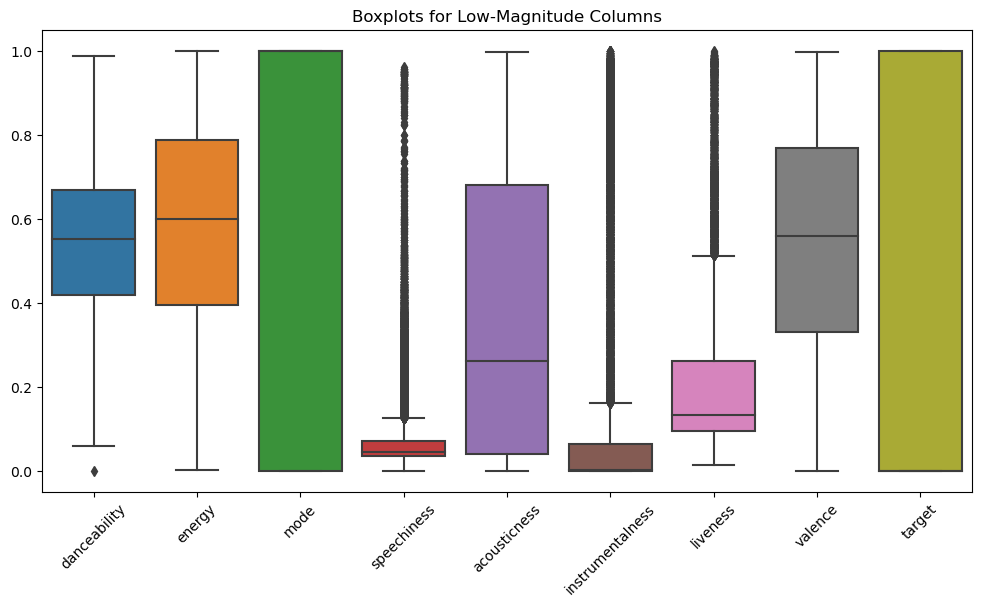

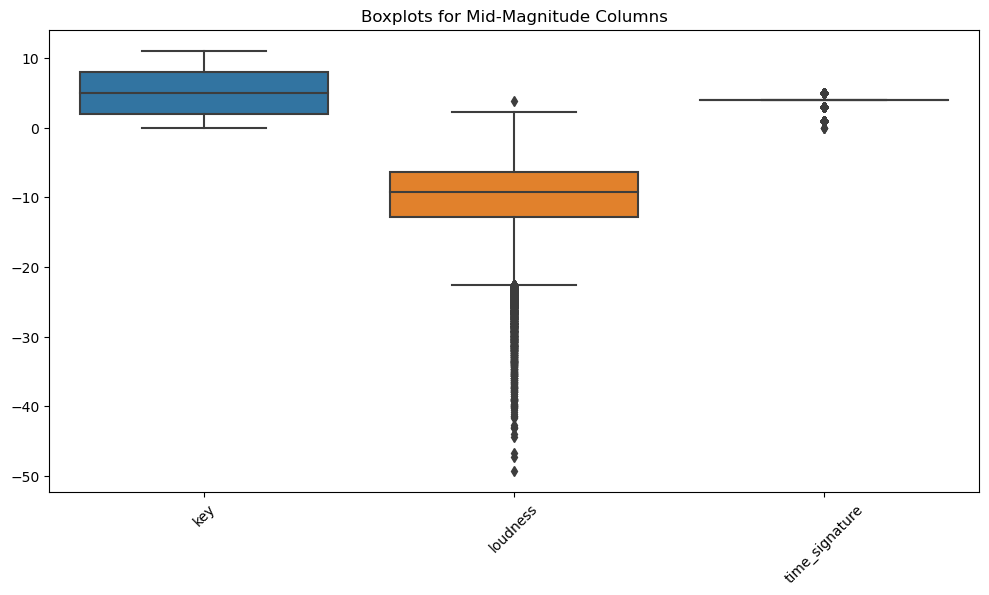

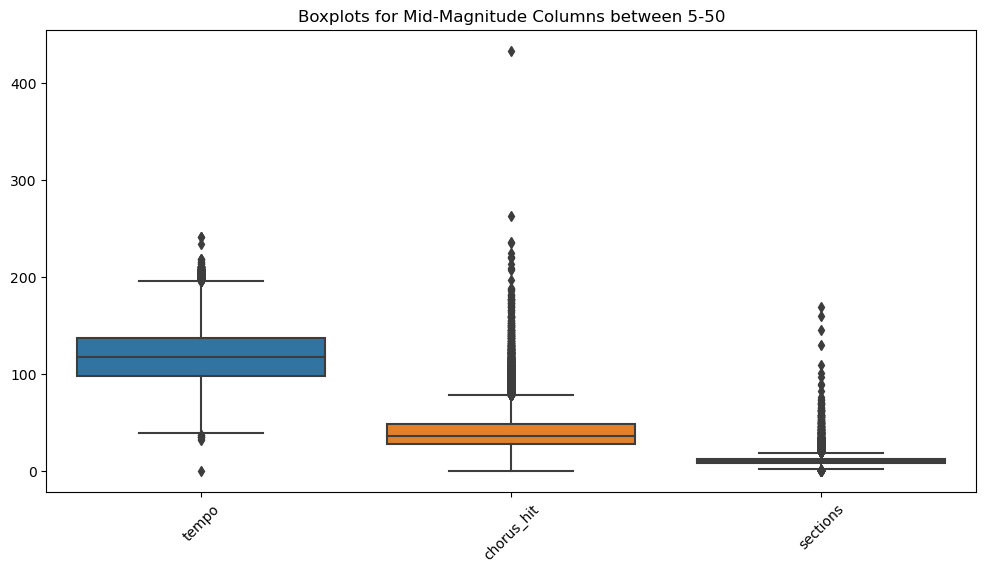

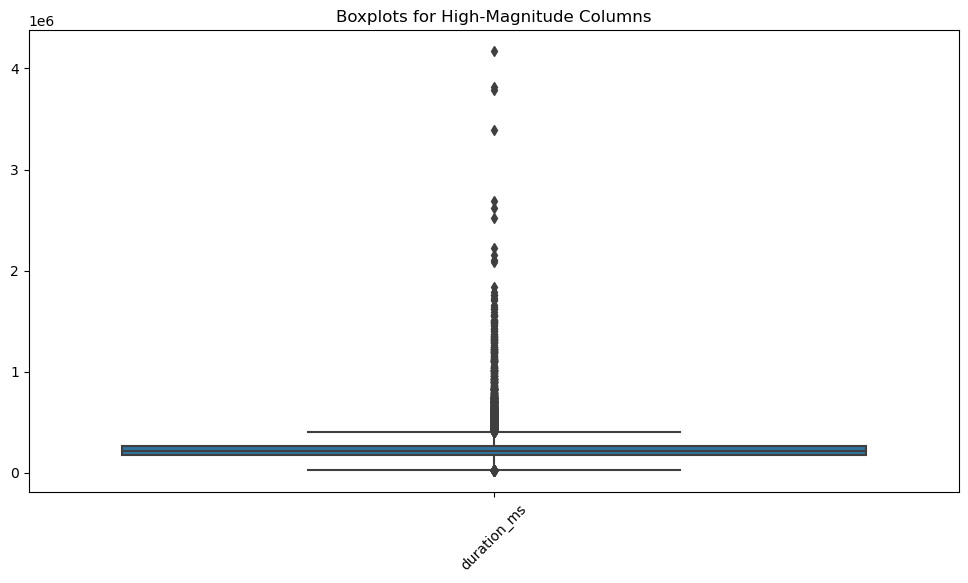

In [11]:
# Calculate absolute max value for each column to categorize based on magnitude
col_magnitudes = file_path[numeric_columns].apply(lambda x: max(abs(x.min()), abs(x.max())))

# Define magnitude thresholds for grouping
low_range = col_magnitudes[col_magnitudes < 5].index.tolist()
mid_range = col_magnitudes[(col_magnitudes >= 5) & (col_magnitudes < 50)].index.tolist()
mid_range_2 = col_magnitudes[(col_magnitudes >= 50) & (col_magnitudes < 1000)].index.tolist()
high_range = col_magnitudes[col_magnitudes >= 1000].index.tolist()

# Function to plot grouped boxplots
def plot_boxplot(column_list, title):
    if column_list:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=file_path[column_list])
        plt.xticks(rotation=45)
        plt.title(title)
        plt.show()

# Plot separate boxplots for each group
plot_boxplot(low_range, "Boxplots for Low-Magnitude Columns")
plot_boxplot(mid_range, "Boxplots for Mid-Magnitude Columns")
plot_boxplot(mid_range_2, "Boxplots for Mid-Magnitude Columns between 5-50")
plot_boxplot(high_range, "Boxplots for High-Magnitude Columns")

(c) Draw pairplots.

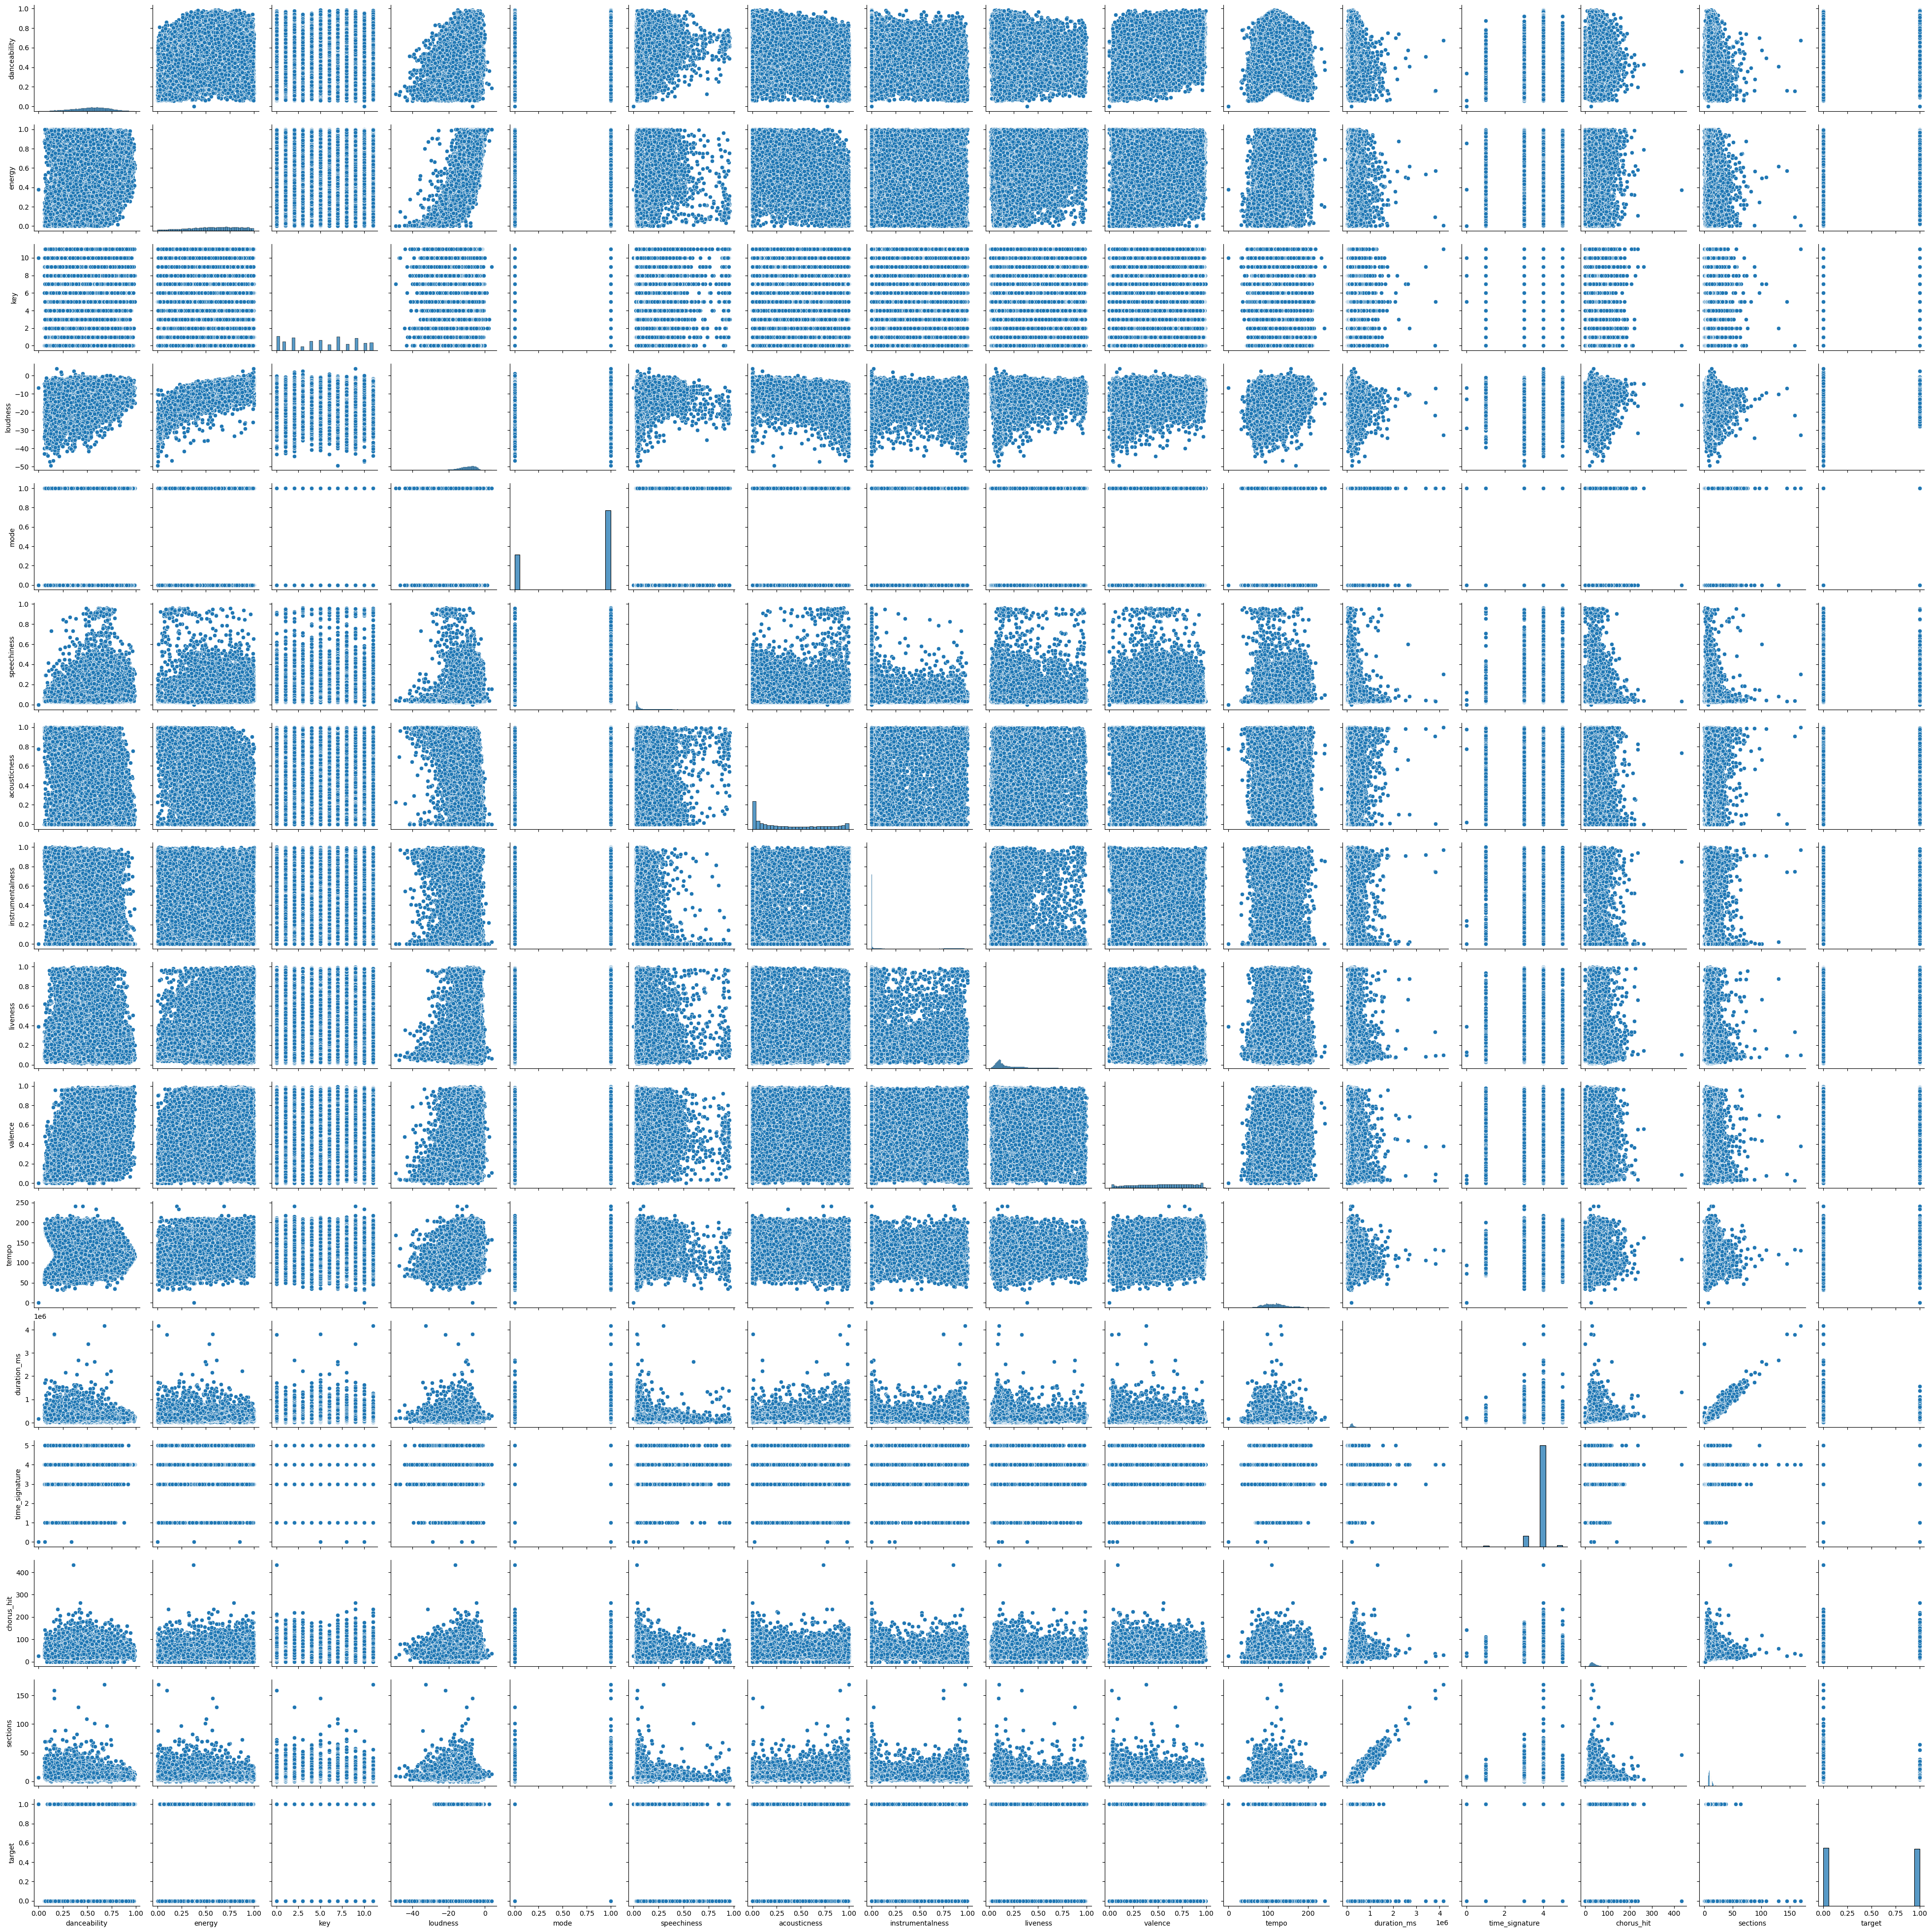

In [12]:
# Pairplot of the dataset
sns.pairplot(file_path[numeric_columns])
plt.show()

C:\Users\hirshikesh\AppData\Local\Temp\ipykernel_26664\3852432633.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(file_path.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


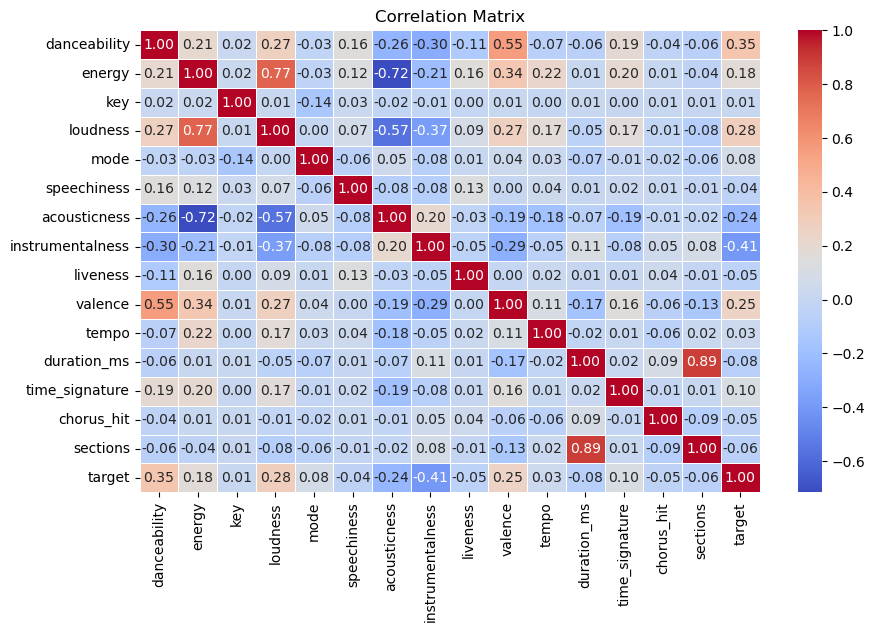


Value Counts for track:
Falling                   17
Angel                     13
Hold On                   12
You                       12
Crazy                     12
                          ..
Like The Man Said          1
Lee a Low                  1
Down By The Lazy River     1
Daisy Jane                 1
Calling My Spirit          1
Name: track, Length: 35860, dtype: int64

Value Counts for artist:
Traditional                      207
Harry Belafonte                  140
P. Susheela                      130
Ennio Morricone                  128
Jerry Goldsmith                  124
                                ... 
Az Yet Featuring Peter Cetera      1
Kimbo Children's Music             1
Andrea Martin                      1
The Toasters                       1
The Neighbourhood                  1
Name: artist, Length: 11904, dtype: int64


In [13]:
# Dropping 'uri' column as it is not useful for model
file_path = file_path.drop('uri', axis = 1)

# Handle mixed data types (convert possible numeric columns)
'''
for col in non_numeric_columns:
    try:
        file_path[col] = pd.to_numeric(file_path[col], errors='coerce')  
    except Exception:
        print(f"Skipping non-convertible column: {col}")
'''

# Drop non-numeric columns from numerical analysis
df_numeric = file_path[numeric_columns]
            
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(file_path.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Value counts for categorical features (Modify as needed)
categorical_columns = file_path.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(file_path[col].value_counts())

(d) Calculate the correlation if the scatter plot shows a correlation among variables. We can use the following command for this purpose.

In [14]:
from scipy.stats import pearsonr
# Calculate Pearson's correlation for each numerical column with the target variable (here, its danceability)
if 'danceability' in file_path.columns:
    correlations = {}
    for col in numeric_columns:
        if col != 'danceability':
            corr, _ = pearsonr(file_path[col], file_path['danceability'])
            correlations[col] = corr
    
    # Converting the above to DataFrame
    corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Pearson Correlation'])
    print("\nPearson Correlations with Danceability:\n")
    print(corr_df)


Pearson Correlations with Danceability:

                  Pearson Correlation
energy                       0.205252
key                          0.015464
loudness                     0.274328
mode                        -0.031720
speechiness                  0.157083
acousticness                -0.260056
instrumentalness            -0.302353
liveness                    -0.114316
valence                      0.553816
tempo                       -0.065088
duration_ms                 -0.064032
time_signature               0.191306
chorus_hit                  -0.035720
sections                    -0.059830
target                       0.345802


Features to Keep 🟢

energy (0.205)
loudness (0.274)
acousticness (-0.260)
instrumentalness (-0.302)
valence (0.554)
speechiness (0.157)

Features to Drop 🛑

key, mode, liveness, tempo, duration_ms, time_signature, chorus_hit, sections 
due to low pearson correlation with danceability.

In [15]:
# List of columns to drop based on correlation analysis
cols_to_drop = [
    'key', 'mode', 'liveness', 'tempo', 
    'duration_ms', 'time_signature', 'chorus_hit', 'sections'
]

# Drop these columns from the dataframe
file_path = file_path.drop(columns=cols_to_drop)

print("Dropped columns:", cols_to_drop)
print("\n")
print("Remaining columns:", file_path.columns)

Dropped columns: ['key', 'mode', 'liveness', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']


Remaining columns: Index(['track', 'artist', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'target'],
      dtype='object')


(e) Reflect on your key learnings and difficulties while completing this assignment, encapsulating your thoughts in approximately 100 words within a text cell.

### Reflection on Key Learnings and Difficulties

#### **Key Learnings:**
- Got to work on the EDA **(Exploratory Data Analysis)** using various techniques.
- how to clean the data and replace missing values based on the EDA and insights from the data visualization.
- Used Descriptive statistics to understand the data distribution by (mean, mdian, standard deviaton)
- Used boxplots and pairplots to visualize the features and their relationships. These plots also helped detect outliers.
- Applied Person correlation and dropped columns that did not showed high correlation with the target variable.
- Learned how to analyze the dataset from visualizaton.


#### **Challenges Faced:**
- **Handling missing values**: Since there was no missing values in our dataset we did not have to worry about it.
- **Data inconsistency**: Some features required more handling before analysis and visualization.
- **Visualization adjustments**: Ensuring that graphs were clear and easy to interpret. Faced some difficulty interpreting pairplots.
- Deciding which columns to keep and what all needs to be dropped and how will they affect our model was something that consumed a lot of time and brainstorming.